In [5]:
import pandas as pd 


# Carico il dataset
df = pd.read_csv("Dataset/dataset_resampled.csv")

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,3316,15,0,0,3,0.867944,10,1,2,0,0,0,0,2.240451,0.0
1,1820,15,1,1,2,5.463192,3,1,4,1,0,0,0,3.941760,0.0
2,2436,16,0,0,1,18.220314,0,0,4,0,0,0,0,3.752639,0.0
3,1092,18,1,0,2,7.724728,0,0,2,1,1,0,0,3.506920,0.0
4,2321,18,0,2,1,19.885760,2,0,3,1,0,0,0,3.517237,0.0


In [6]:
df = df.drop(columns=["StudentID"])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,15,0,0,3,0.867944,10,1,2,0,0,0,0,2.240451,0.0
1,15,1,1,2,5.463192,3,1,4,1,0,0,0,3.941760,0.0
2,16,0,0,1,18.220314,0,0,4,0,0,0,0,3.752639,0.0
3,18,1,0,2,7.724728,0,0,2,1,1,0,0,3.506920,0.0
4,18,0,2,1,19.885760,2,0,3,1,0,0,0,3.517237,0.0


##### Applicazione K-Means

In [51]:
# Seleziona solo le colonne numeriche
df_features = df.drop(columns=["GradeClass"])

# Se necessario, normalizza i dati (importante per K-Means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

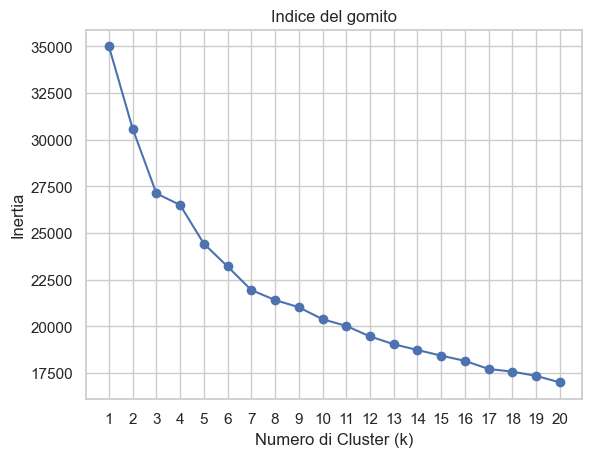

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


inertia = []
k_range = range(1, 21)  # Analizziamo i valori di k da 1 a 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualizzazione del grafico
plt.plot(k_range, inertia, marker='o')
plt.title('Indice del gomito')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [76]:
from sklearn.cluster import KMeans

# Impostiamo il numero di cluster, ad esempio, 5 (puoi cambiarlo in base alla tua analisi)
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)

# Fitting del modello
kmeans.fit(df_scaled)

# Otteniamo i cluster assegnati a ciascun dato
df['Cluster'] = kmeans.labels_
#df.head()

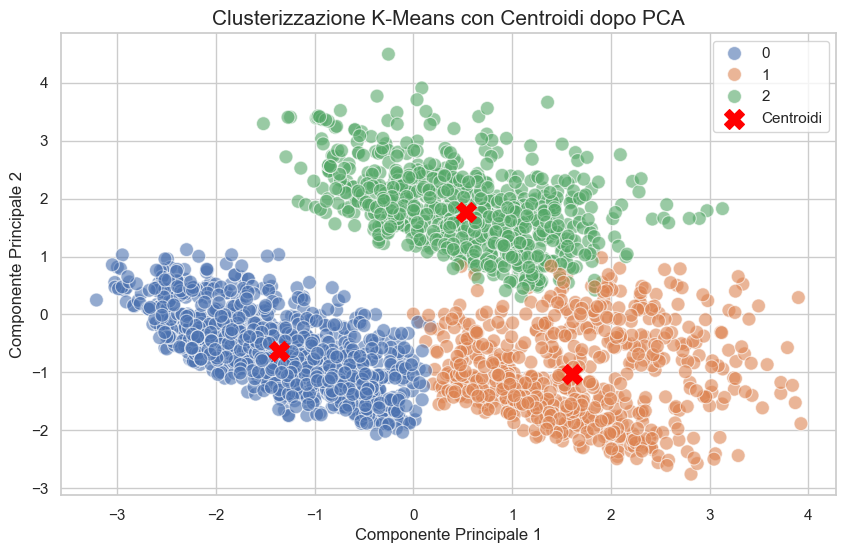

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Applicare PCA per ridurre i dati a 2D
pca = PCA(n_components=2)
df_scaled_2d = pca.fit_transform(df_scaled)  # df_scaled è il tuo dataset normalizzato

# Aggiungiamo i centroidi anche dopo PCA
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Creiamo una palette di colori per i cluster
sns.set(style="whitegrid")
palette = sns.color_palette("deep", n_colors=3)

# Impostiamo il grafico a dispersione (scatter plot)
plt.figure(figsize=(10, 6))

# Mostriamo i dati con i cluster
sns.scatterplot(x=df_scaled_2d[:, 0], y=df_scaled_2d[:, 1], hue=df['Cluster'], palette=palette, s=100, alpha=0.6, edgecolor="w", legend="full")

# Mostriamo i centroidi
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='X', label='Centroidi')


# Aggiungiamo etichette al grafico
plt.title('Clusterizzazione K-Means con Centroidi dopo PCA', fontsize=15)
plt.xlabel('Componente Principale 1', fontsize=12)
plt.ylabel('Componente Principale 2', fontsize=12)
plt.legend()

# Mostriamo il grafico
plt.show()



##### Calcolo Silhouette

Silhouette Score medio per il clustering: 0.153


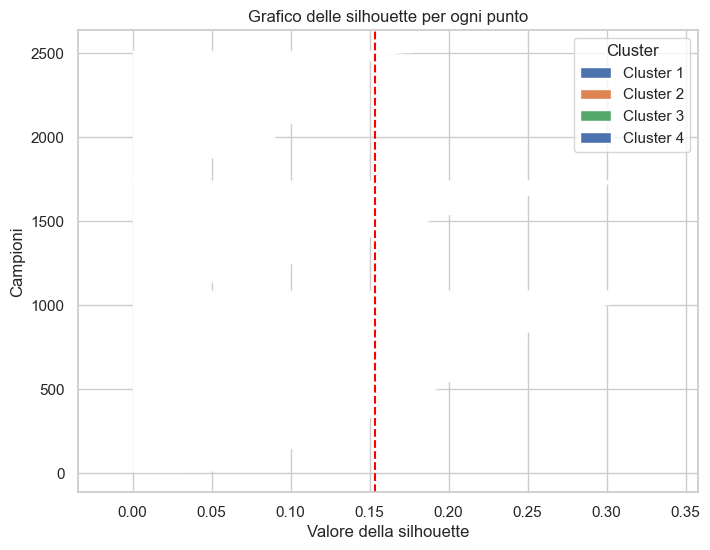

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

# Assumiamo che 'df_scaled' sia il tuo dataset scalato, e che 'kmeans' sia il modello KMeans
y_kmeans = kmeans.fit_predict(df_scaled)  # df_scaled è il tuo dataset scalato

# Calcolo dei valori della silhouette per ogni punto
silhouette_vals = silhouette_samples(df_scaled, y_kmeans)

# Calcolo del punteggio medio di silhouette per il clustering
silhouette_avg = silhouette_score(df_scaled, y_kmeans)
print(f"Silhouette Score medio per il clustering: {silhouette_avg:.3f}")

# Creazione del grafico delle silhouette
fig, ax = plt.subplots(figsize=(8, 6))

# Crea una palette di colori per i cluster
palette = sns.color_palette("deep", n_colors=4)  # Cambia 4 con il numero di cluster

# Per ogni cluster, calcoliamo la posizione delle barre
y_lower = 10
for i in range(4):  # Numero di cluster (modifica questo numero se hai un numero diverso di cluster)
    # Ottieni le silhouette dei punti per questo cluster
    ith_cluster_silhouette_values = silhouette_vals[y_kmeans == i]
    
    # Ordina i valori delle silhouette
    ith_cluster_silhouette_values.sort()
    
    # Calcola la larghezza della barra
    size_cluster = ith_cluster_silhouette_values.shape[0]
    
    # Posiziona le barre del grafico per ogni cluster con il colore associato
    ax.barh(range(y_lower, y_lower + size_cluster), ith_cluster_silhouette_values, height=1.0, 
            label=f'Cluster {i+1}')  # Colore per il cluster
    
    # Aggiorna la posizione di y_lower per il prossimo cluster
    y_lower += size_cluster

# Aggiungi il punteggio medio della silhouette come una linea verticale
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Etichette e titolo
ax.set_xlabel("Valore della silhouette")
ax.set_ylabel("Campioni")
ax.set_title("Grafico delle silhouette per ogni punto")

# Aggiungi la leggenda
ax.legend(title="Cluster")

# Mostra il grafico delle silhouette
plt.show()
